In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conect = sqlite3.connect("sales_data.db")
cursor = conect.cursor()

In [3]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT ,
    product TEXT,
    quantity INTEGER,
    price REAL 
    )
    ''')

In [4]:
sample_data = [
    ("Tshirt",3,400),
    ("Shirt",3,2200),
    ("Socks",4,130),
    ("Belt",5,130),
    ("Shoe",10,2200),
    ("Jacket",23, 2500),
    ("Sweater", 12,3200),
    ("Hoodie", 23, 1200)
]

In [5]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?,?,?)", sample_data)

   product  total_quantity
0     Belt               5
1   Hoodie              23
2   Jacket              23
3    Shirt               3
4     Shoe              10
5    Socks               4
6  Sweater              12
7   Tshirt               3


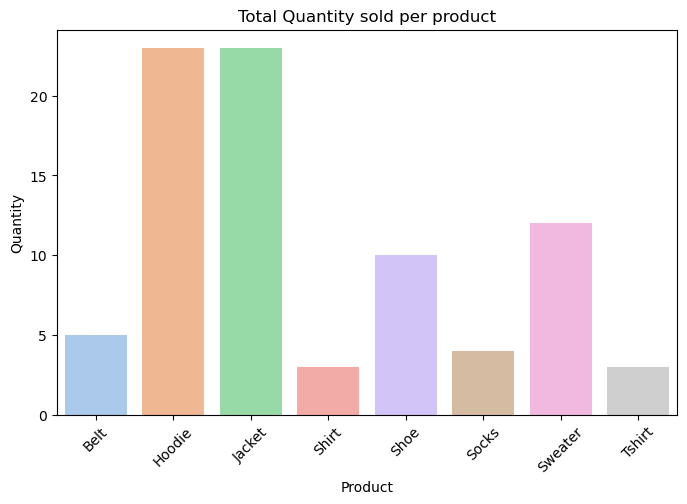

In [36]:
total_quantity = '''
    SELECT  product,SUM(quantity) as total_quantity
    from sales group by product
    '''
df = pd.read_sql_query(total_quantity, conect)
print(df)


plt.figure(figsize = (8,5))
sns.barplot(data=df, x = 'product', y = 'total_quantity',hue= 'product', palette = 'pastel')
plt.title('Total Quantity sold per product')
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
plt.figure(figsize=(3,5))
df.plot(kind='

In [7]:
revenue_query = '''
    SELECT product, quantity * price AS revenue
    FROM sales
'''
df_revenue = pd.read_sql_query(revenue_query, conect)



In [8]:
#making bar chart


<Figure size 800x500 with 0 Axes>

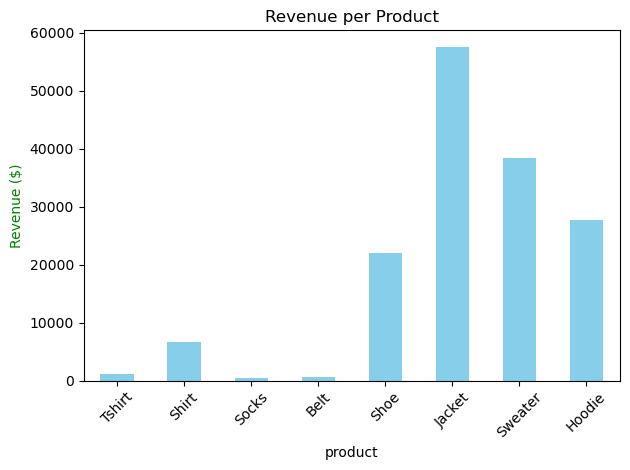

In [38]:
plt.figure(figsize=(8, 5))
df_revenue.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue per Product")
plt.ylabel("Revenue ($)", color = 'green')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

